In [ ]:
##Machine Learning - Classification Algorthm

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error,r2_score
import joblib

In [99]:
##Dataaset

In [100]:
df=pd.read_csv('C:/Users/ADMIN/Desktop/DA andDS/Excel(ML)/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


##Data Preprocessing

In [101]:
df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [102]:
df.tail

<bound method NDFrame.tail of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [103]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [105]:
##To find the Missing Value

In [106]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [107]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [108]:
##Barplot

TypeError: 'str' object is not callable

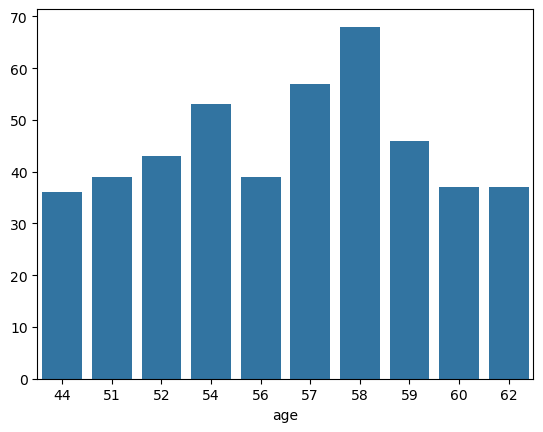

In [109]:
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [ ]:
df.sex.value_counts()

In [113]:
total_genders_count=len(df.sex)
male_count=len(df[df['sex']==1])
female_count=len(df[df['sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 1025
Male Count    : 713
Female Count  : 312


In [114]:
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 69.56%
Female State: 30.44%


TypeError: 'str' object is not callable

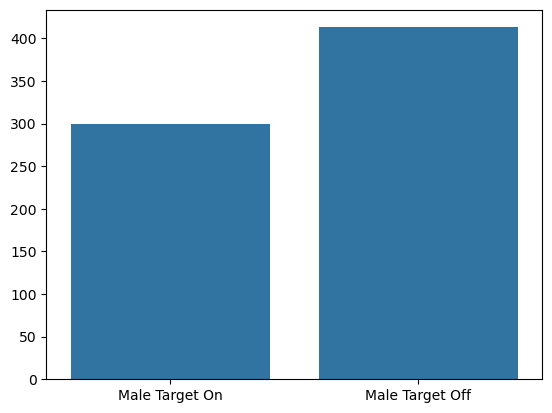

In [115]:
#Male State & target 1 & 0
male_andtarget_on=len(df[(df.sex==1)&(df['target']==1)])
male_andtarget_off=len(df[(df.sex==1)&(df['target']==0)])
sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

TypeError: 'str' object is not callable

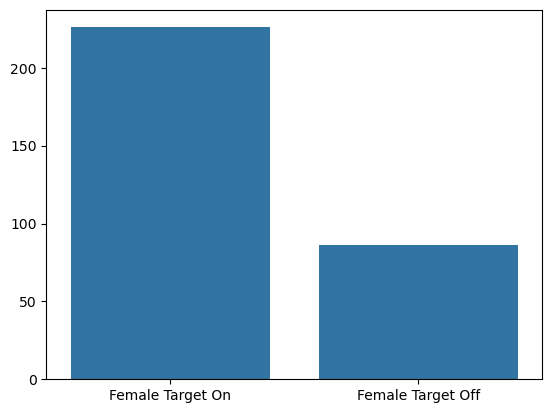

In [116]:
#Female State & target 1 & 0
female_andtarget_on=len(df[(df.sex==0)&(df['target']==1)])
female_andtarget_off=len(df[(df.sex==0)&(df['target']==0)])
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

TypeError: 'str' object is not callable

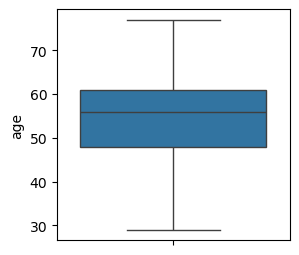

In [117]:
#outlier detection
for col in df:
    plt.figure(figsize=(3, 3))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [118]:
##zscore

In [119]:
a=df.groupby('target').size().reset_index(name='Value').rename(columns={'target':'Target'})

In [120]:
from scipy import stats
zscore=np.abs(stats.zscore(a))
zscore

,Target,Value
0,1.0,1.0
1,1.0,1.0


In [121]:
b=zscore>3

In [122]:
b

,Target,Value
0,False,False
1,False,False


In [123]:
b=zscore<-3
b

,Target,Value
0,False,False
1,False,False


In [124]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


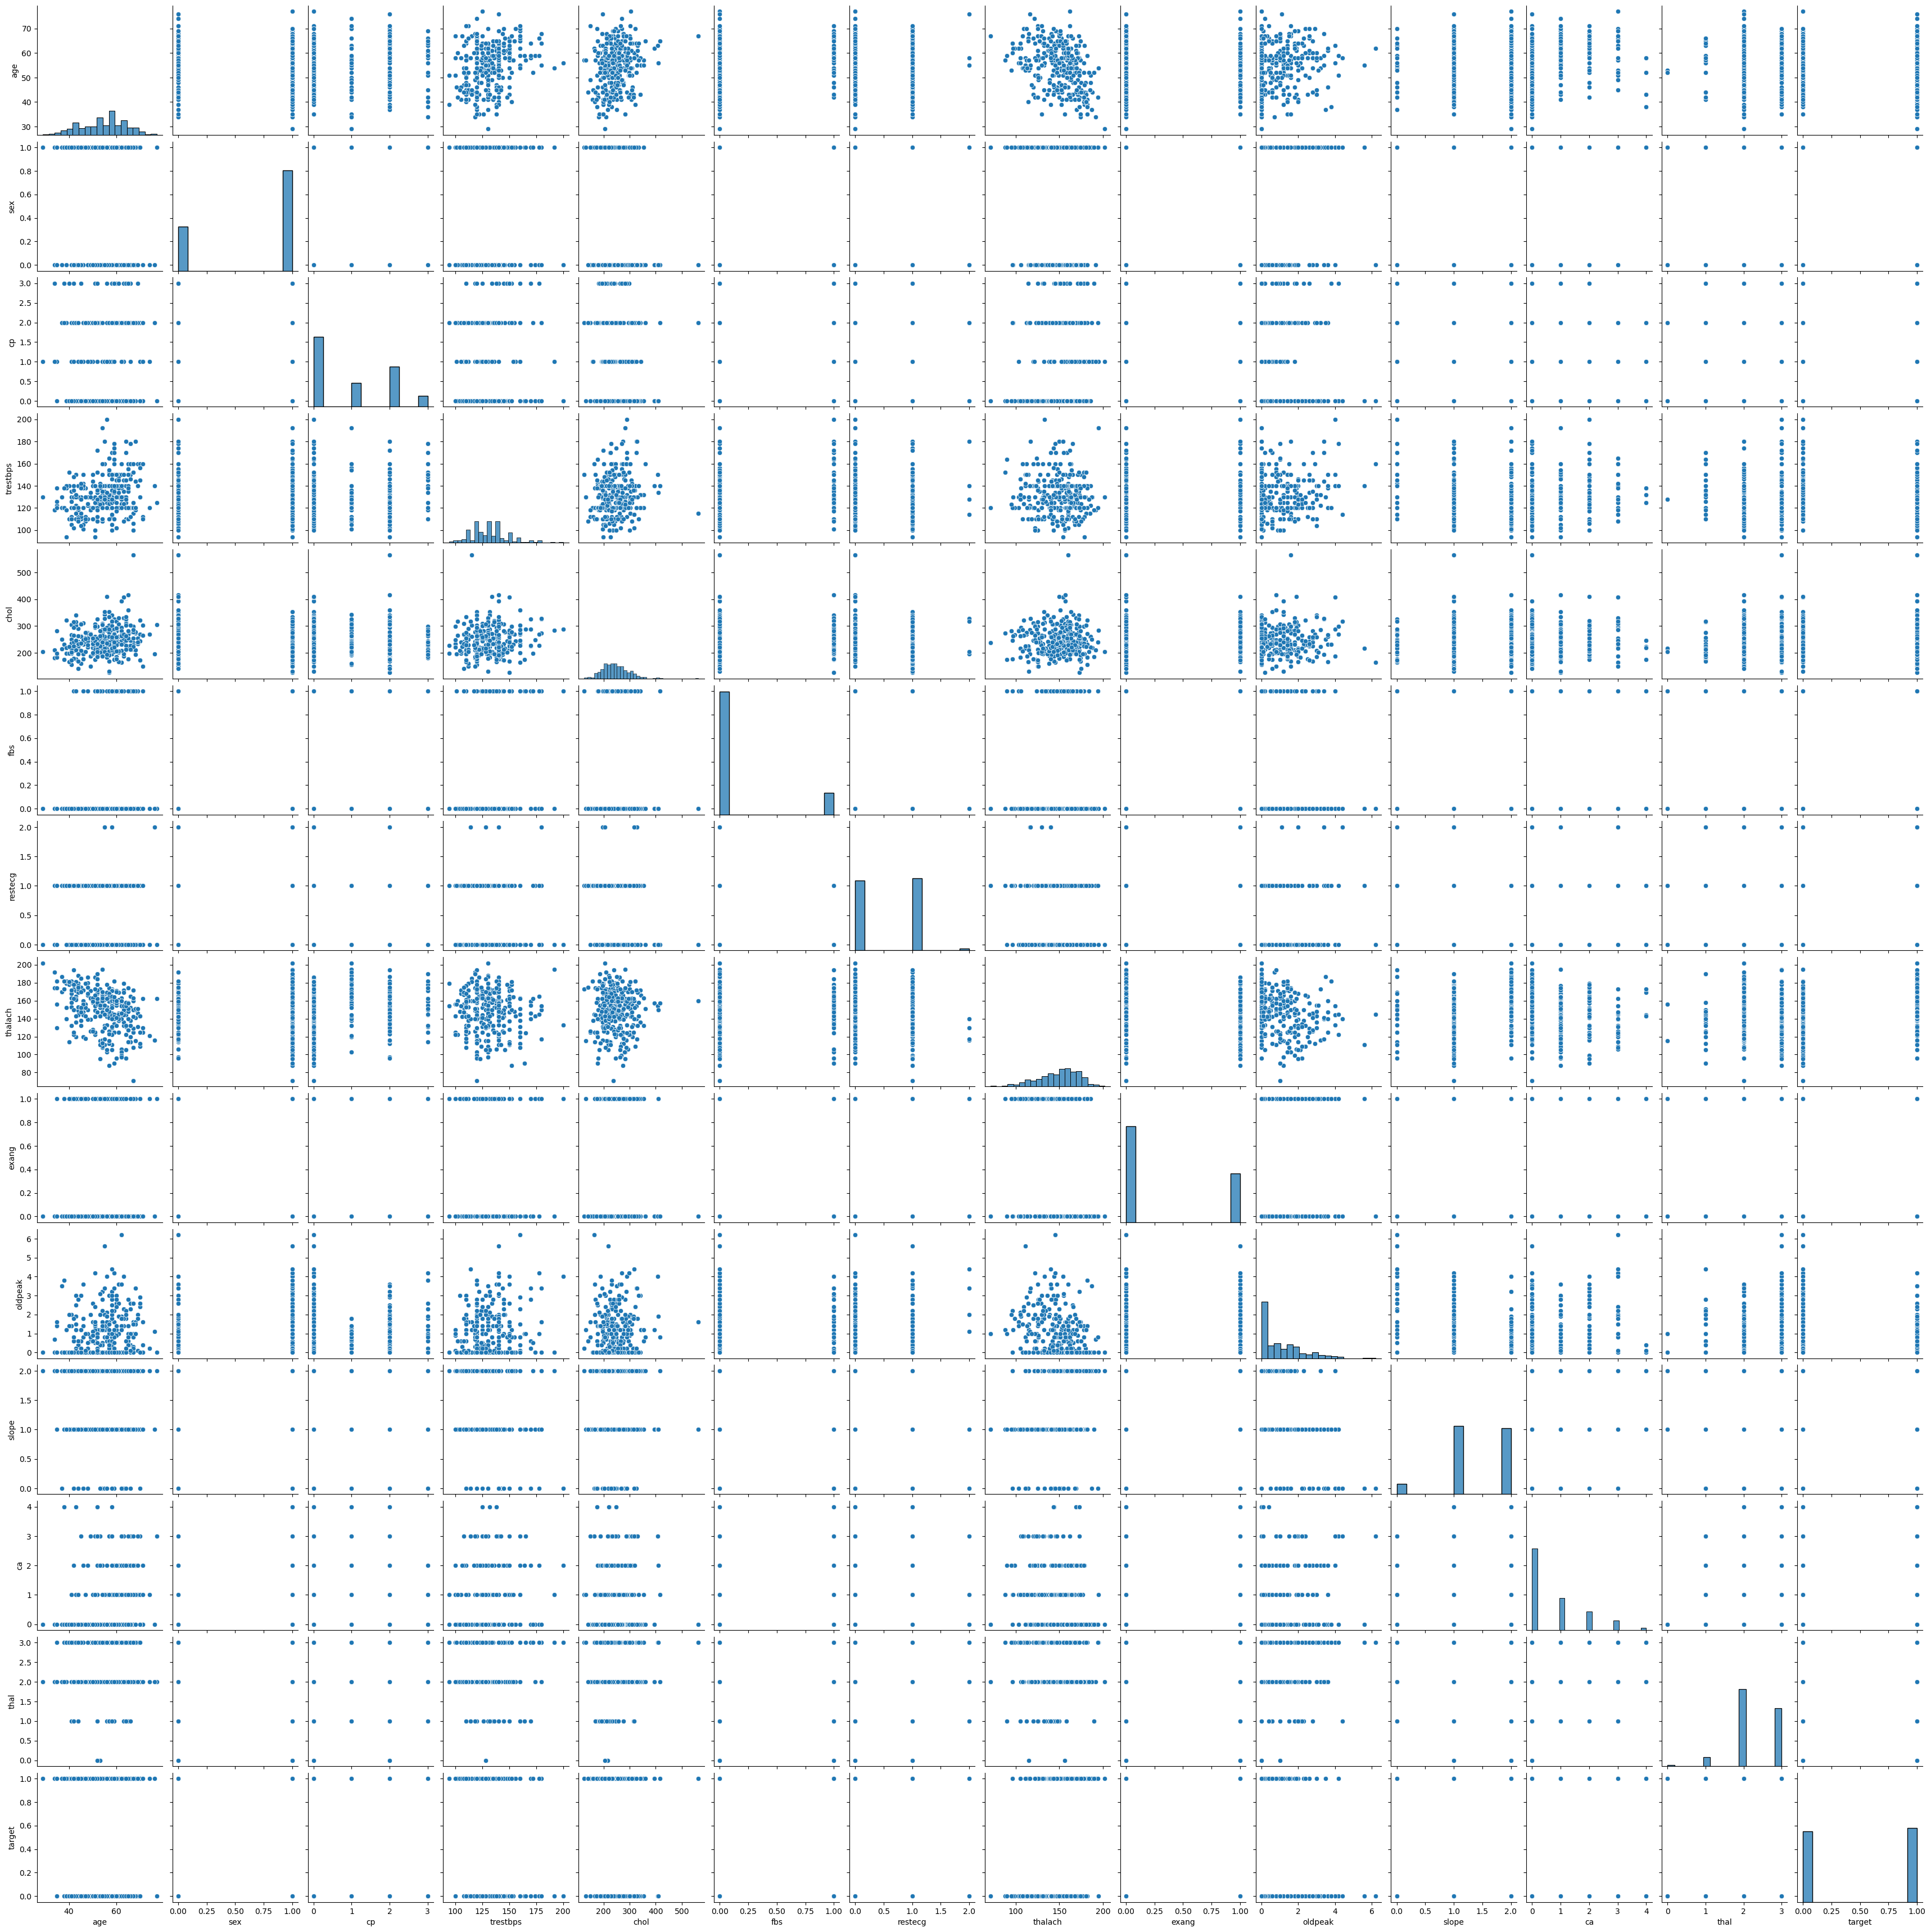

In [125]:
sns.pairplot(df)

In [126]:
##Heatmap of the correlation

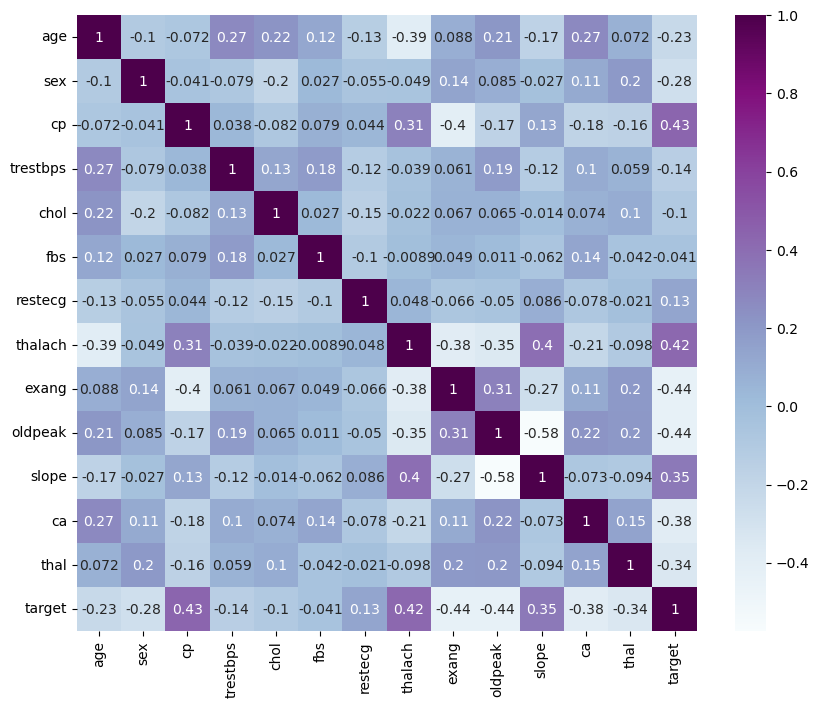

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.show()

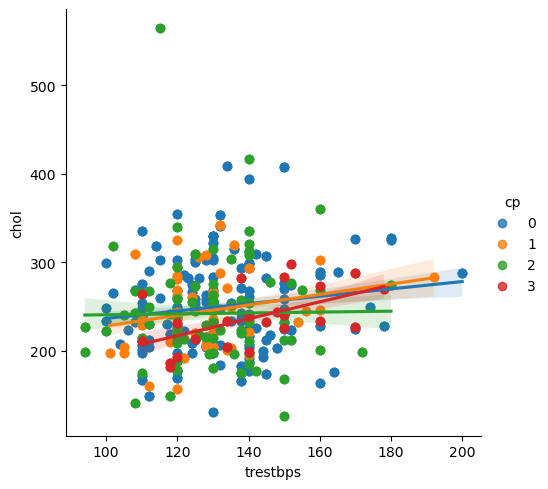

In [128]:
# Show the results of a linear regression 
sns.lmplot(x="trestbps", y="chol",data=df,hue="cp")
plt.show()

In [129]:
df.target.unique()

array([0, 1], dtype=int64)

In [130]:
##Split the Data as Train and Test datas

In [131]:
## X-Independent Values

In [133]:
x=df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [134]:
## Y-Dependent Values

In [135]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 835   49    1   2       118   149    0        0      126      0      0.8   
 137   64    0   0       180   325    0        1      154      1      0.0   
 534   54    0   2       108   267    0        0      167      0      0.0   
 495   59    1   0       135   234    0        1      161      0      0.5   
 244   51    1   2       125   245    1        0      166      0      2.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 700   41    1   2       130   214    0        0      168      0      2.0   
 71    61    1   0       140   207    0        0      138      1      1.9   
 106   51    1   0       140   299    0        1      173      1      1.6   
 270   43    1   0       110   211    0        1      161      0      0.0   
 860   52    1   0       112   230    0        1      160      0      0.0   
 
      slope  ca  thal  
 835      2   3     2  
 137      2   0     2  
 5

In [137]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [138]:
##Classifier Algorthms

In [139]:
logistc=LogisticRegression()
logistc

LogisticRegression()

In [140]:
logistc.fit(x_train,y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
pred=logistc.predict(x_test)
pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [142]:
logistc_MSE=mean_squared_error(y_test,pred)
logistc_MSE

0.2146341463414634

In [143]:
performance=r2_score(y_test,pred)
performance

0.14144298496097452

In [144]:
##With Hyper Parameter Tunning

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Penalty type
    'solver': ['liblinear', 'saga']        # Solver
}

In [147]:
grid_search = GridSearchCV(logistc, param_grid, cv=5)

In [148]:
grid_search.fit(x_train,y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [149]:
##access best_params_
best_params = grid_search.best_params_  
best_score = grid_search.best_score_
print('Best Parameters:', best_params)
print('Best Score:', best_score)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8548780487804878


In [150]:
y_pred=grid_search.best_estimator_.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [151]:
confusion_matrix(y_pred,y_test)

array([[71, 13],
       [31, 90]], dtype=int64)

In [152]:
accuracy_score(y_test,y_pred)

0.7853658536585366

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [154]:
##KNearestNeighbors Classifier

In [155]:
Knn=KNeighborsClassifier()
Knn

KNeighborsClassifier()

In [156]:
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [157]:
pred=Knn.predict(x_test)
pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [158]:
Knn_MSE=mean_squared_error(y_test,pred)
Knn_MSE

0.2682926829268293

In [159]:
Perf=r2_score(y_test,pred)
Perf

-0.07319626879878194

In [160]:
confusion_matrix(y_test,pred)

array([[74, 28],
       [27, 76]], dtype=int64)

In [161]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [162]:
##WithHyperParameter

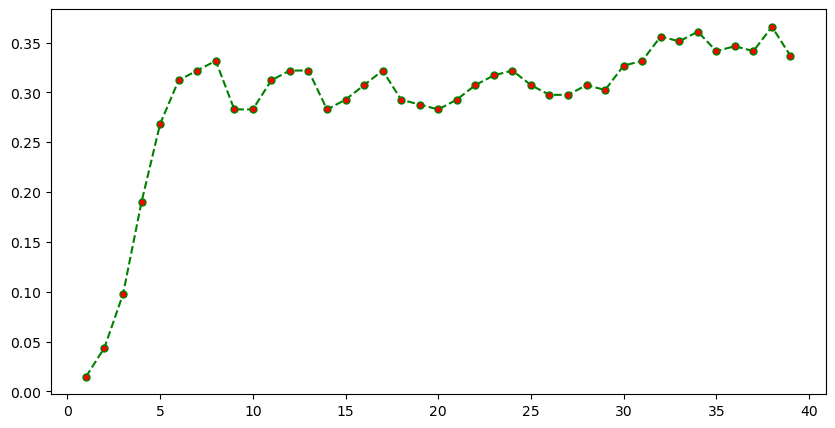

In [163]:
error_rate=[]
for i in range(1,40):
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(x_train,y_train)
    pred=Knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='red',markersize=5)
plt.xlabel='K value'
plt.ylabel='error rate'
plt.title='k value vs error rate'

In [164]:
knn=KNeighborsClassifier(n_neighbors=10)

In [165]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [166]:
pr=knn.predict(x_test)
accuracy_score(y_test,pr)

0.7170731707317073

In [167]:
knn=KNeighborsClassifier(n_neighbors=38)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=38)

In [168]:
pr=knn.predict(x_test)
accuracy_score(y_test,pr)

0.6341463414634146

In [169]:
##NaiveBayes Classifier

In [170]:
GNB=GaussianNB()
GNB

GaussianNB()

In [171]:
GNB.fit(x_train, y_train)

GaussianNB()

In [172]:
# Predicting on testing set
y_pred = GNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [173]:
# Calculating accuracy
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [174]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [175]:
##DecisionTreeClassifier

In [176]:
DT=DecisionTreeClassifier(max_depth=2)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.499\nsamples = 820\nvalue = [397, 423]'),
 Text(0.25, 0.5, 'x[11] <= 0.5\ngini = 0.371\nsamples = 398\nvalue = [300, 98]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 177\nvalue = [87, 90]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.07\nsamples = 221\nvalue = [213, 8]'),
 Text(0.75, 0.5, 'x[12] <= 2.5\ngini = 0.354\nsamples = 422\nvalue = [97, 325]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.234\nsamples = 317\nvalue = [43, 274]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 105\nvalue = [54, 51]')]

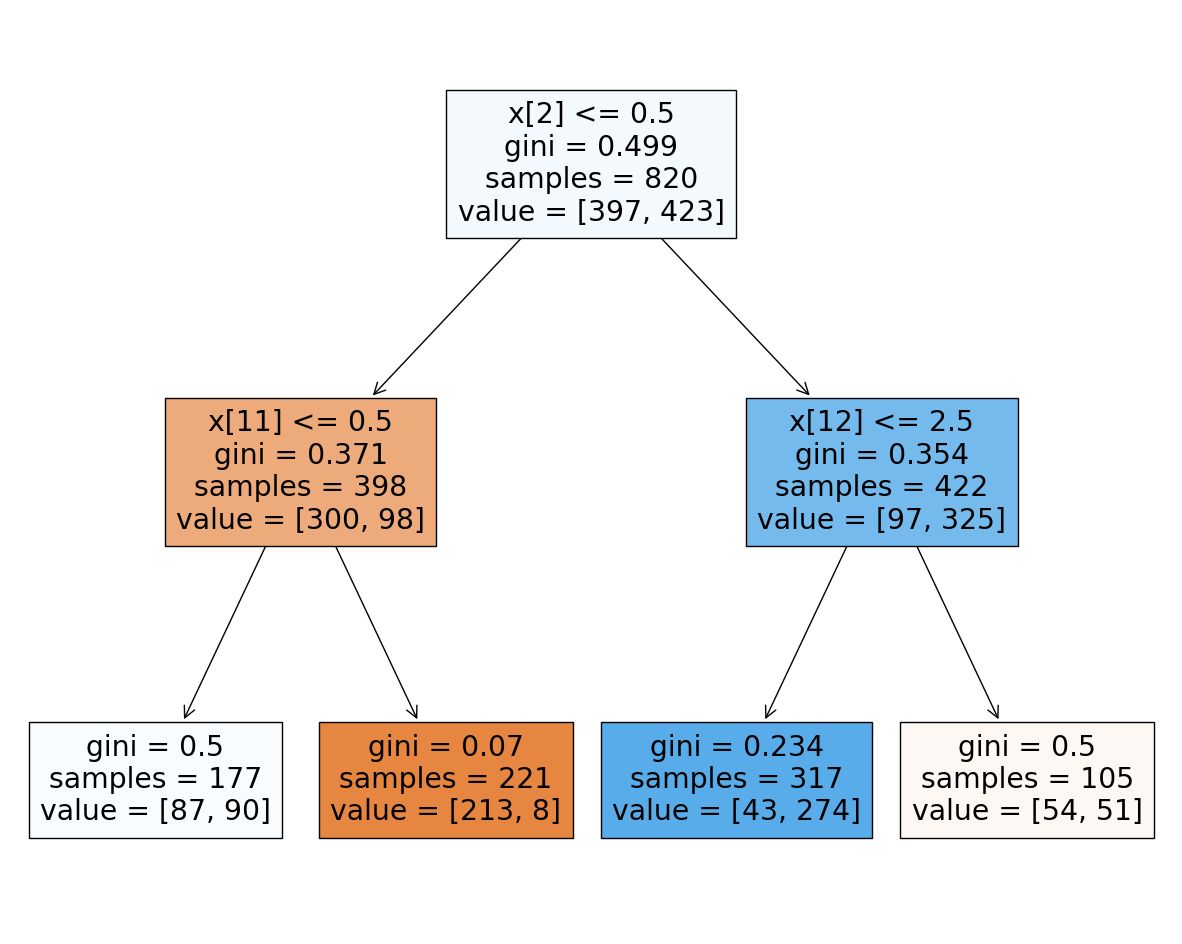

In [177]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(DT,filled=True)

In [178]:
y_pred=DT.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [179]:
print(confusion_matrix(y_test,y_pred))

[[61 41]
 [25 78]]


In [180]:
print(accuracy_score(y_test,y_pred))

0.6780487804878049


In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       102
           1       0.66      0.76      0.70       103

    accuracy                           0.68       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.68      0.68      0.68       205



In [182]:
##Support Vector Machine(SVM)

In [183]:
svm=SVC()
svm

SVC()

In [184]:
svm.fit(x_train,y_train)

SVC()

In [185]:
pred=svm.predict(x_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [186]:
accuracy=accuracy_score(y_test,pred)
print(f"Accuracy:{accuracy}")

Accuracy:0.6829268292682927


In [187]:
##With Hyper Parameter Tunning

In [188]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    
}

# Initialize and train the model with GridSearch
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Score for SVM:", grid_search_svm.best_score_)

# Make predictions
y_pred_svm_tuned = grid_search_svm.predict(x_test)

# Evaluate the model
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
report_svm_tuned = classification_report(y_test, y_pred_svm_tuned)

print("SVM Accuracy (With Tuning):", accuracy_svm_tuned)
print("SVM Classification Report (With Tuning):\n", report_svm_tuned)


Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best Score for SVM: 0.8512195121951219
SVM Accuracy (With Tuning): 0.7951219512195122
SVM Classification Report (With Tuning):
               precision    recall  f1-score   support

           0       0.88      0.68      0.77       102
           1       0.74      0.91      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.79      0.79       205
weighted avg       0.81      0.80      0.79       205



In [189]:
##Random Rorest Classifier

In [190]:
# Train the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [191]:
# Evaluate the model for testing
y_pred = rf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



array([[102,   0],
       [  0, 103]], dtype=int64)

In [192]:
##With Hyper Parameter Tunning

In [193]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize and train the model with GridSearch
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

# Make predictions
y_pred_rf_tuned = grid_search_rf.predict(x_test)

# Evaluate the model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print("Random Forest Accuracy (With Tuning):", accuracy_rf_tuned)
print("Random Forest Classification Report (With Tuning):\n", report_rf_tuned)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest: 0.9841463414634146
Random Forest Accuracy (With Tuning): 0.9853658536585366
Random Forest Classification Report (With Tuning):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [194]:
joblib.dump(rf,'C:/Users/ADMIN/Desktop/DA andDS/Excel(ML)/Milestone3_classifier.pkl')

['C:/Users/ADMIN/Desktop/DA andDS/Excel(ML)/Milestone3_classifier.pkl']

In [195]:
Load_model=joblib.load('C:/Users/ADMIN/Desktop/DA andDS/Excel(ML)/Milestone3_classifier.pkl')
Load_model

RandomForestClassifier()

In [96]:
##Conclusion

In [196]:
#The Random Forest classifier outperforms other models in predicting the heart dataset, achieving a remarkable accuracy of 99%.